Missing values per column:
 Cooker_Type        3
Vessel_Type        0
Year               0
Loading_Method     0
Max_Temperature    0
dtype: int64
Mean Squared Error: 601.4385010465724
R² Score: 0.8370048770728633


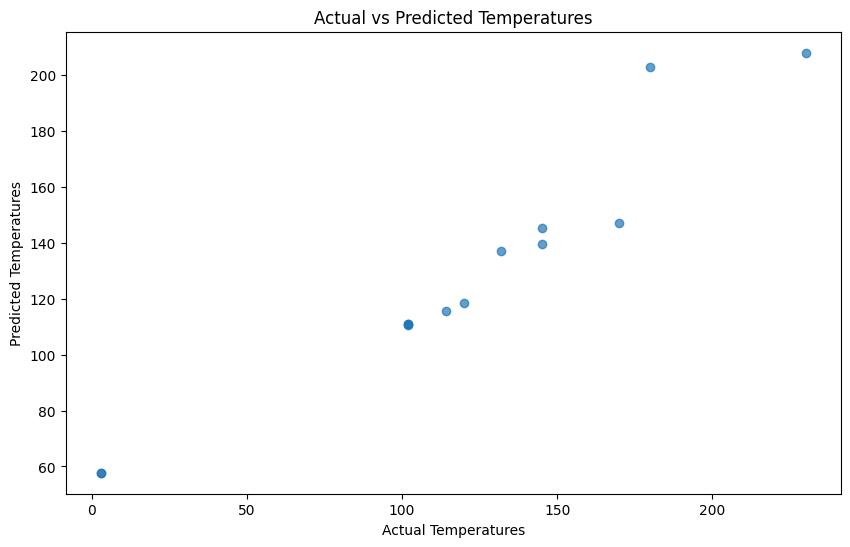

Missing values per column:
 Cooker_Type        0
Vessel_Type        0
Year               0
Loading_Method     0
Max_Temperature    0
dtype: int64
Mean Squared Error: 601.4385010465724
R² Score: 0.8370048770728633


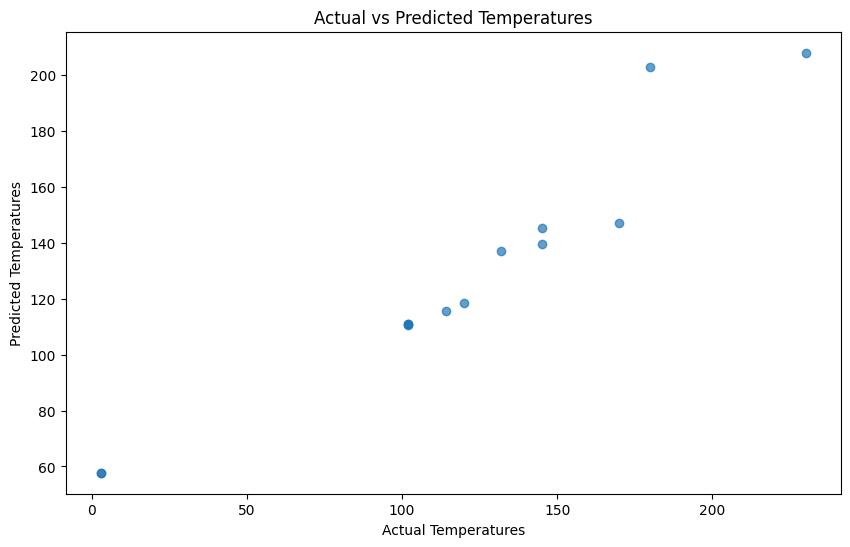

Missing values per column:
 Cooker_Type        0
Vessel_Type        0
Year               0
Loading_Method     0
Max_Temperature    0
dtype: int64
Mean Squared Error: 601.4385010465724
R² Score: 0.8370048770728633


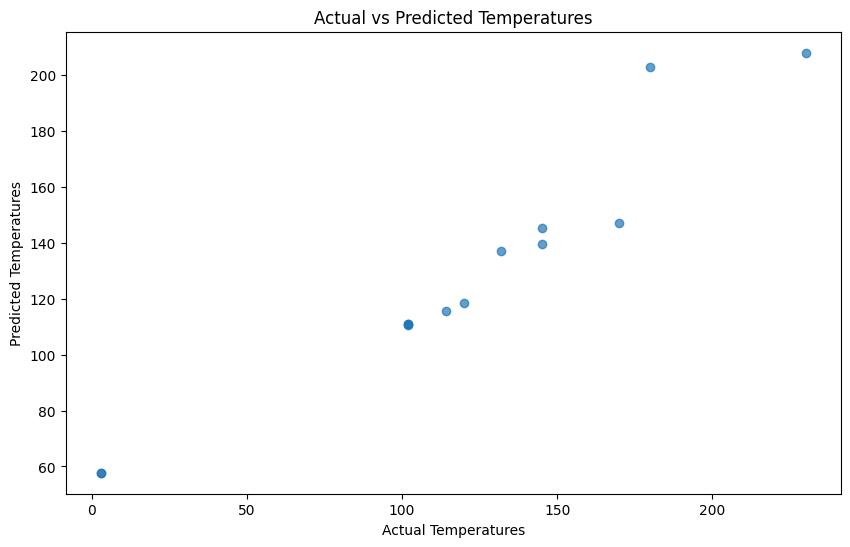

Missing values per column:
 Cooker_Type        0
Vessel_Type        0
Year               0
Loading_Method     0
Max_Temperature    0
dtype: int64
Mean Squared Error: 601.4385010465724
R² Score: 0.8370048770728633


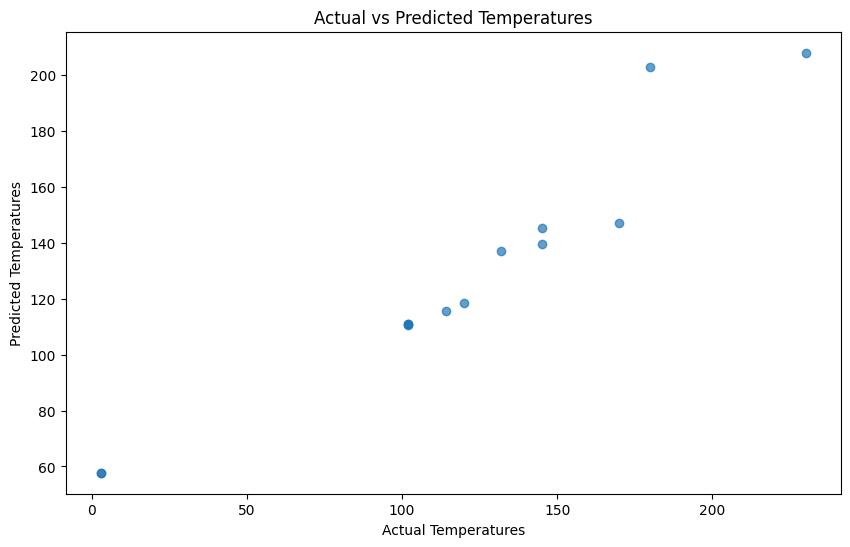

Predicted Maximum Temperature: 162.39583333333331


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load Data
data = pd.read_csv('/content/data.csv')

# Step 2: Clean Data
# Remove '%' and convert Max_Temperature to numeric
data['Max_Temperature'] = data['Max_Temperature'].replace(r'[^\d.]', '', regex=True).astype(float)

# Clean other numeric columns if necessary
numeric_columns = ['Year', 'Cooker_Type', 'Vessel_Type', 'Loading_Method']
for col in numeric_columns:
    data[col] = data[col].replace(r'[^\d.]', '', regex=True).astype(float)

    # Check for missing values
    print("Missing values per column:\n", data.isnull().sum())

    # Drop rows with missing Max_Temperature or impute them
    data.dropna(subset=['Max_Temperature'], inplace=True)  # Drop rows with NaN in target
    data.fillna(data.mean(numeric_only=True), inplace=True)  # Fill remaining NaN with column means

    # Encode categorical variables
    data['Cooker_Type'] = data['Cooker_Type'].astype('category').cat.codes
    data['Vessel_Type'] = data['Vessel_Type'].astype('category').cat.codes
    data['Loading_Method'] = data['Loading_Method'].astype('category').cat.codes

    # Define features (X) and target (y)
    X = data[['Cooker_Type', 'Vessel_Type', 'Year', 'Loading_Method']]
    y = data['Max_Temperature']

    # Step 3: Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Train Model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Step 5: Evaluate Model
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")

    # Step 6: Visualize Results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel("Actual Temperatures")
    plt.ylabel("Predicted Temperatures")
    plt.title("Actual vs Predicted Temperatures")
    plt.show()

    # Step 7: Make Predictions
    new_data = pd.DataFrame({
        'Cooker_Type': [0],  # Replace with appropriate encoded values
        'Vessel_Type': [1],
        'Year': [2023],
        'Loading_Method': [1]
})
predicted_temp = model.predict(new_data)
print(f"Predicted Maximum Temperature: {predicted_temp[0]}")


Mean Squared Error: 601.4385010465724
R² Score: 0.8370048770728633


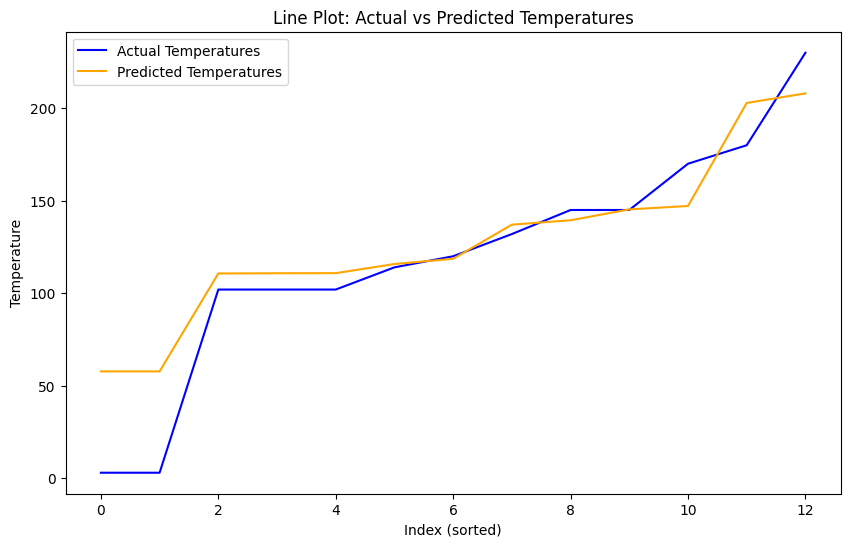

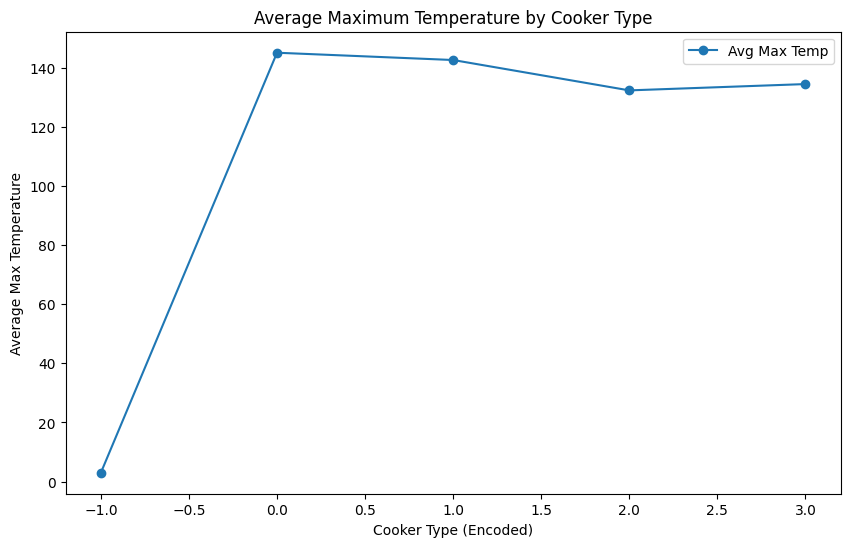

Mean Squared Error: 601.4385010465724
R² Score: 0.8370048770728633


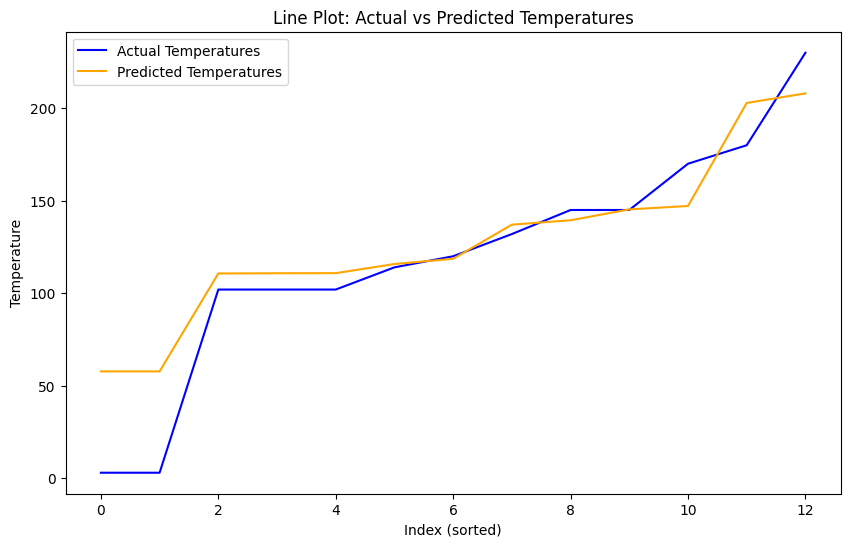

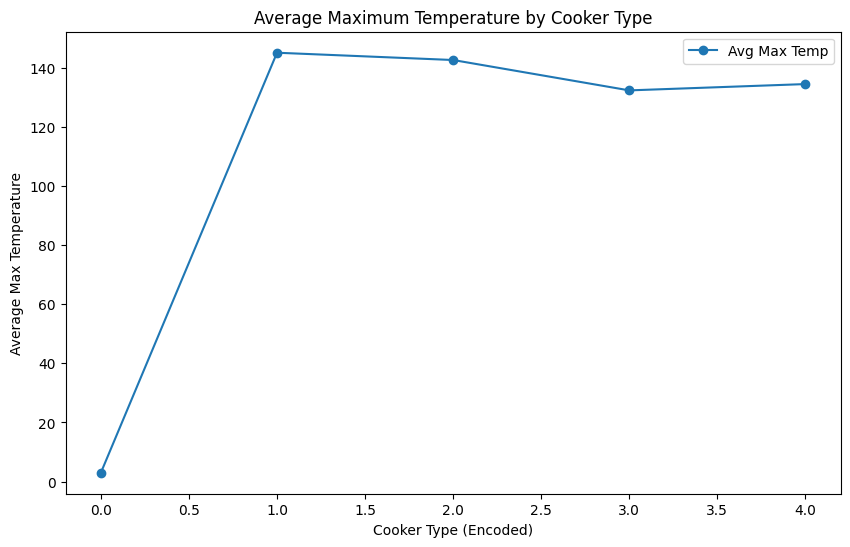

Mean Squared Error: 601.4385010465724
R² Score: 0.8370048770728633


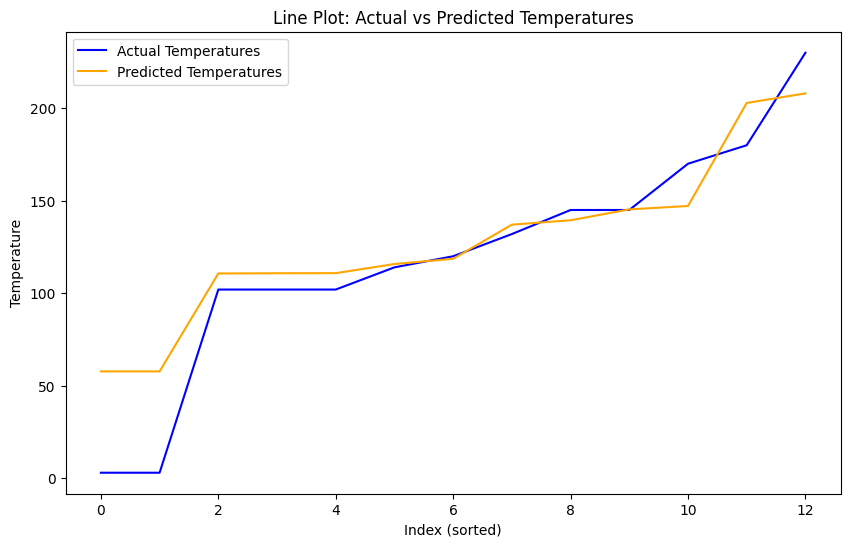

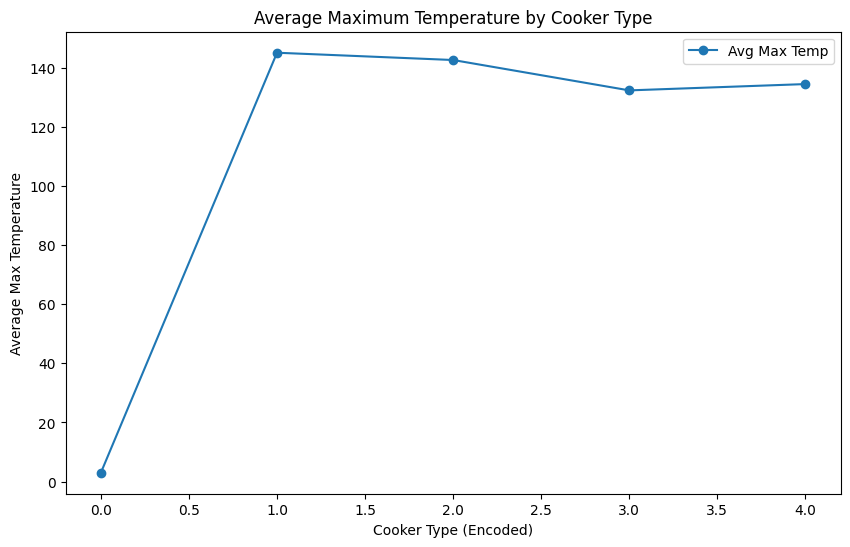

Mean Squared Error: 601.4385010465724
R² Score: 0.8370048770728633


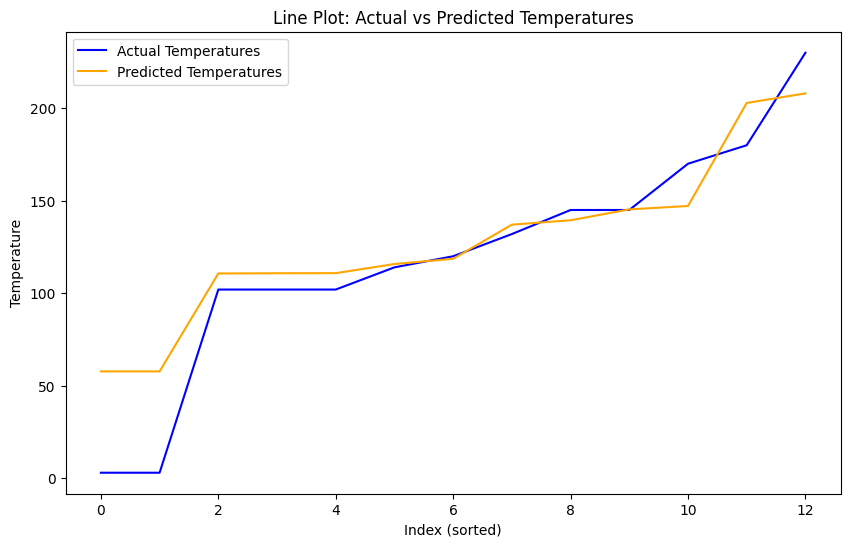

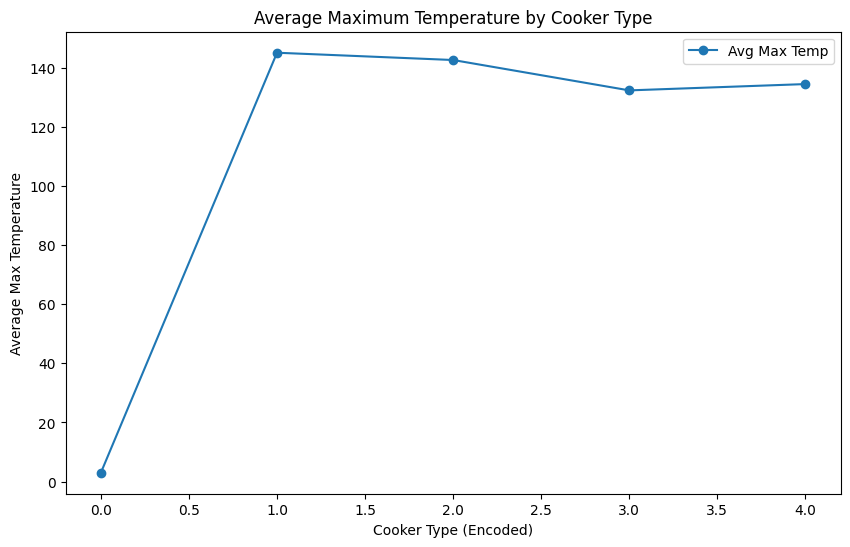

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load Data
data = pd.read_csv('data.csv')

# Step 2: Clean Data
# Remove '%' and convert Max_Temperature to numeric
data['Max_Temperature'] = data['Max_Temperature'].replace(r'[^\d.]', '', regex=True).astype(float)

# Clean other numeric columns if necessary
numeric_columns = ['Year', 'Cooker_Type', 'Vessel_Type', 'Loading_Method']
for col in numeric_columns:
    data[col] = data[col].replace(r'[^\d.]', '', regex=True).astype(float)

    # Drop rows with missing Max_Temperature
    data.dropna(subset=['Max_Temperature'], inplace=True)

    # Encode categorical variables
    data['Cooker_Type'] = data['Cooker_Type'].astype('category').cat.codes
    data['Vessel_Type'] = data['Vessel_Type'].astype('category').cat.codes
    data['Loading_Method'] = data['Loading_Method'].astype('category').cat.codes

    # Define features (X) and target (y)
    X = data[['Cooker_Type', 'Vessel_Type', 'Year', 'Loading_Method']]
    y = data['Max_Temperature']

    # Step 3: Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Train Model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Step 5: Evaluate Model
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")

    # Step 6: Line Plot - Predictions vs Actual
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test.sort_values(), label="Actual Temperatures", color="blue")
    plt.plot(range(len(y_pred)), np.sort(y_pred), label="Predicted Temperatures", color="orange")
    plt.xlabel("Index (sorted)")
    plt.ylabel("Temperature")
    plt.title("Line Plot: Actual vs Predicted Temperatures")
    plt.legend()
    plt.show()

    # Step 7: Line Plot - Feature Trends
    # Example: Average Max Temperature per Cooker Type
    average_temps = data.groupby('Cooker_Type')['Max_Temperature'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(average_temps.index, average_temps.values, marker='o', label="Avg Max Temp")
    plt.xlabel("Cooker Type (Encoded)")
    plt.ylabel("Average Max Temperature")
    plt.title("Average Maximum Temperature by Cooker Type")
    plt.legend()
    plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
data = pd.read_csv("/content/solar_cooker_data.csv")  # Replace with your file path
print(data.head())


   Year Month    Cooker Type Vessel Type Category  Temperature (°C)
0  2022   May  CWSL (Type 1)    VESSEL 1      CCC               152
1  2022   May  CWBL (Type 2)    VESSEL 1      CCC               158
2  2022   May   BTC (Type 3)    VESSEL 1      CCC               132
3  2022   May  CWSL (Type 1)    VESSEL 2      DPV               145
4  2022   May  CWBL (Type 2)    VESSEL 2      DPV               152


In [ ]:
# Encode categorical variables
data["Cooker Type"] = data["Cooker Type"].astype("category").cat.codes
data["Vessel Type"] = data["Vessel Type"].astype("category").cat.codes

# Features and target
X = data[["Year", "Cooker Type", "Vessel Type"]]  # Add other features if available
y = data["Temperature (°C)"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd

# Data
data = [
    {"Year": 2022, "Month": "May", "Cooker Type": "CWSL (Type 1)", "Vessel Type": "VESSEL 1", "Category": "CCC", "Temperature (°C)": 152},
    {"Year": 2022, "Month": "May", "Cooker Type": "CWBL (Type 2)", "Vessel Type": "VESSEL 1", "Category": "CCC", "Temperature (°C)": 158},
    {"Year": 2022, "Month": "May", "Cooker Type": "BTC (Type 3)", "Vessel Type": "VESSEL 1", "Category": "CCC", "Temperature (°C)": 132},
    {"Year": 2022, "Month": "May", "Cooker Type": "CWSL (Type 1)", "Vessel Type": "VESSEL 2", "Category": "DPV", "Temperature (°C)": 145},
    {"Year": 2022, "Month": "May", "Cooker Type": "CWBL (Type 2)", "Vessel Type": "VESSEL 2", "Category": "DPV", "Temperature (°C)": 152},
    {"Year": 2022, "Month": "May", "Cooker Type": "BTC (Type 3)", "Vessel Type": "VESSEL 2", "Category": "DPV", "Temperature (°C)": 125},
    {"Year": 2022, "Month": "Nov", "Cooker Type": "CWSL (Type 1)", "Vessel Type": "VESSEL 1", "Category": "CCC", "Temperature (°C)": 129},
    {"Year": 2022, "Month": "Nov", "Cooker Type": "CWBL (Type 2)", "Vessel Type": "VESSEL 1", "Category": "CCC", "Temperature (°C)": 132},
    {"Year": 2022, "Month": "Nov", "Cooker Type": "BTC (Type 3)", "Vessel Type": "VESSEL 1", "Category": "CCC", "Temperature (°C)": 120},
    {"Year": 2023, "Month": "May", "Cooker Type": "CWSL (Type 1)", "Vessel Type": "VESSEL 1", "Category": "CCC", "Temperature (°C)": 155},
    {"Year": 2023, "Month": "May", "Cooker Type": "CWBL (Type 2)", "Vessel Type": "VESSEL 1", "Category": "CCC", "Temperature (°C)": 168},
    {"Year": 2023, "Month": "May", "Cooker Type": "BTC (Type 3)", "Vessel Type": "VESSEL 1", "Category": "CCC", "Temperature (°C)": 151},
                                                ]

                                                # Convert to a DataFrame
df = pd.DataFrame(data)

                                                # Save to a CSV file
df.to_csv("solar_cooker_data.csv", index=False)

print("Dataset saved as 'solar_cooker_data.csv'")


Dataset saved as 'solar_cooker_data.csv'


In [ ]:
# Initialize and train the model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 317.87
R² Score: -5.59


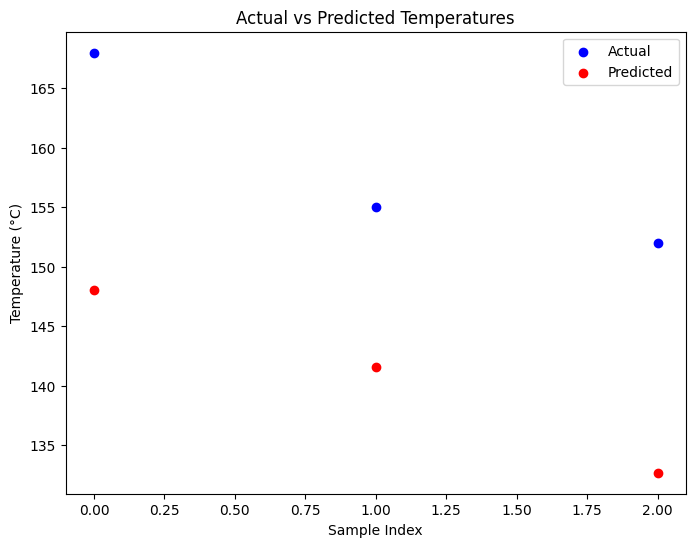

In [ ]:
# Plot actual vs predicted temperatures
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual", color="blue")
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", color="red")
plt.legend()
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Sample Index")
plt.ylabel("Temperature (°C)")
plt.show()


In [ ]:
# Predict temperature for new conditions
new_conditions = pd.DataFrame({
    "Year": [2024],  # Example: Year
    "Cooker Type": [1],  # Example: Encoded for 'CWSL'
    "Vessel Type": [0],  # Example: Encoded for 'VESSEL 1'
            })
predicted_temperature = model.predict(new_conditions)
print(f"Predicted Temperature: {predicted_temperature[0]:.2f} °C")


Predicted Temperature: 148.00 °C


In [ ]:
import joblib

# Save the model
joblib.dump(model, "solar_cooker_model.pkl")

# Load the model
loaded_model = joblib.load("solar_cooker_model.pkl")


In [ ]:
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = linear_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")

Linear Regression - MSE: 97.08, R²: -1.01


In [ ]:
from sklearn.svm import SVR

# Train the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - MSE: {mse_svr:.2f}, R²: {r2_svr:.2f}")

Support Vector Regression - MSE: 736.41, R²: -14.27


In [ ]:
# Ensure Random Forest model is evaluated
from sklearn.metrics import mean_squared_error, r2_score

# Predict using Random Forest
y_pred_rf = model.predict(X_test)

# Calculate MSE and R² for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")

Random Forest - MSE: 317.87, R²: -5.59


In [ ]:
comparison = pd.DataFrame({
      "Algorithm": ["Random Forest", "Linear Regression", "Support Vector Regression"],
      "Mean Squared Error (MSE)": [mse_rf, mse_lr, mse_svr],
      "R² Score": [r2_rf, r2_lr, r2_svr]
              })

print(comparison)


                   Algorithm  Mean Squared Error (MSE)   R² Score
0              Random Forest                317.867932  -5.591731
1          Linear Regression                 97.083333  -1.013249
2  Support Vector Regression                736.409932 -14.271174


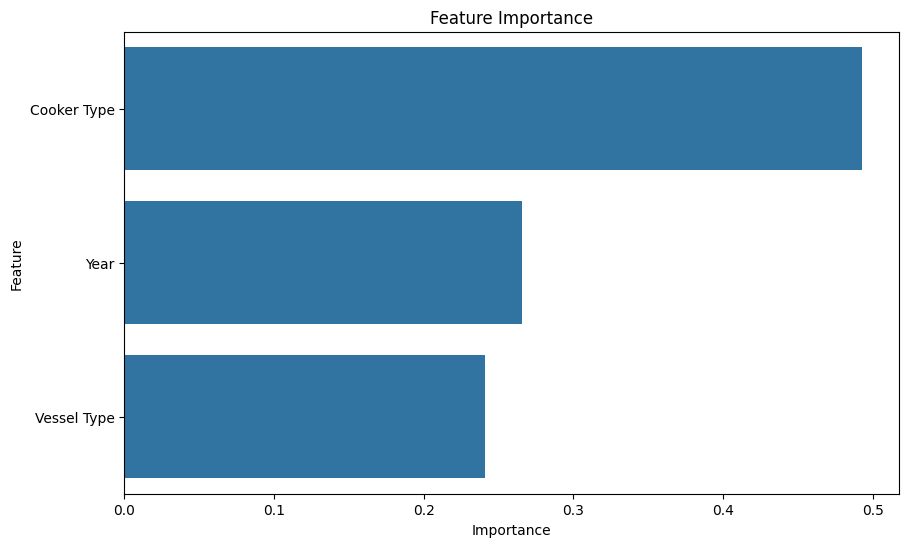

In [ ]:
import seaborn as sns

# Get feature importance from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

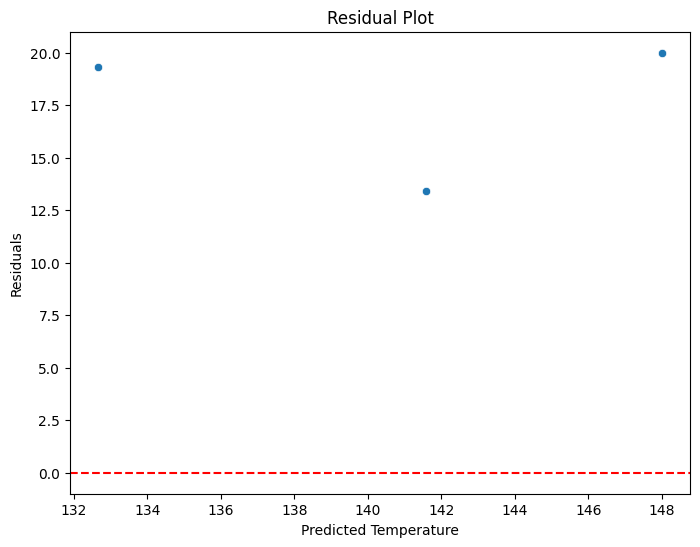

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_rf

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Temperature')
plt.ylabel('Residuals')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

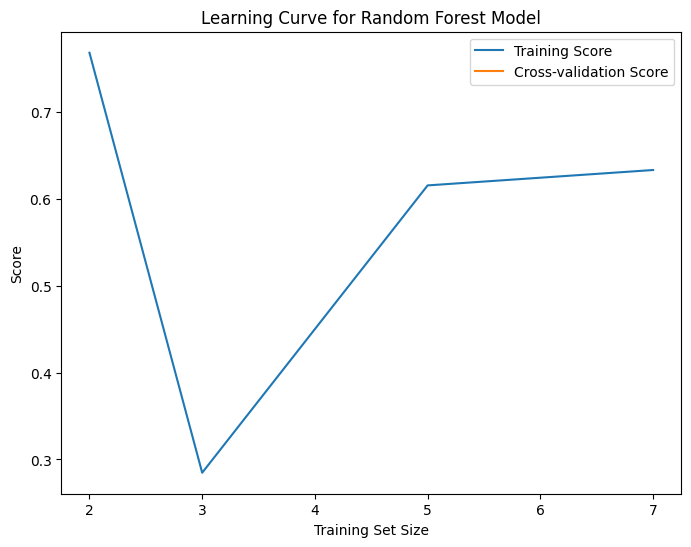

In [ ]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve for Random Forest Model')
plt.legend()
plt.show()

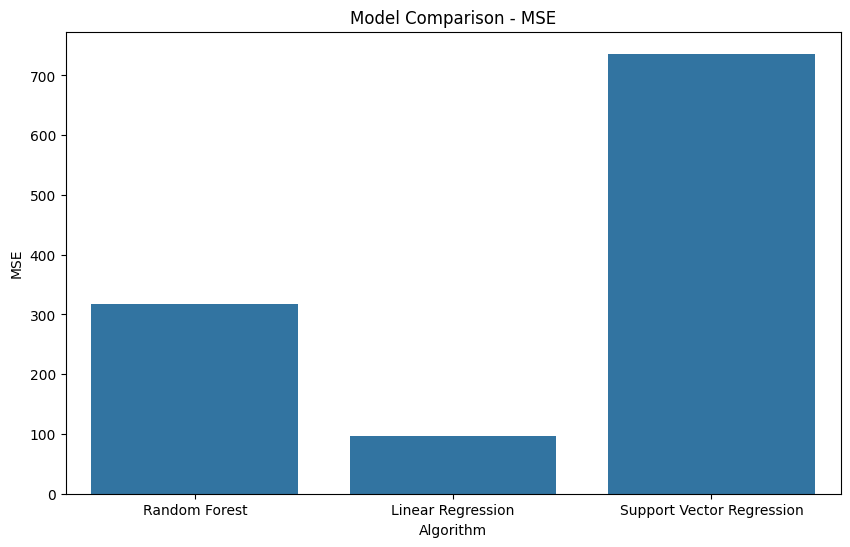

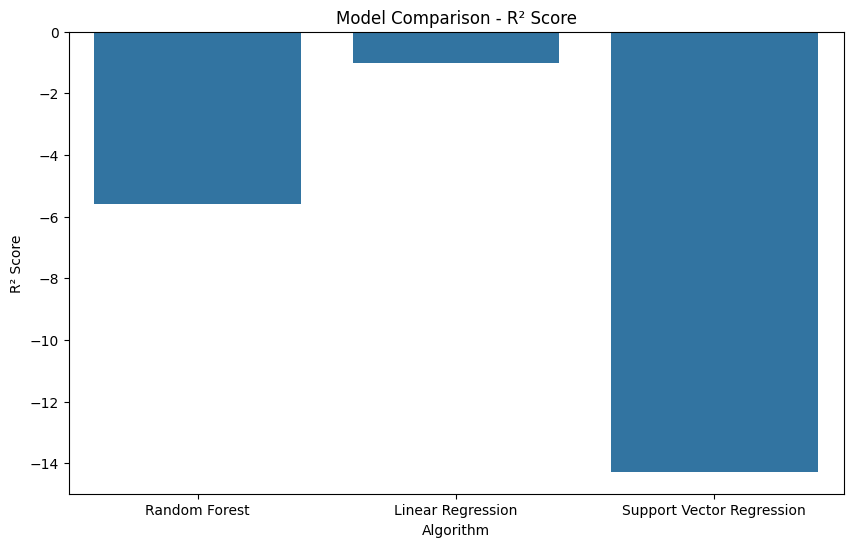

In [ ]:
# Create a bar plot of evaluation metrics
metrics_df = pd.DataFrame({
    'Algorithm': ['Random Forest', 'Linear Regression', 'Support Vector Regression'],
    'MSE': [mse_rf, mse_lr, mse_svr],
    'R² Score': [r2_rf, r2_lr, r2_svr]
            })

 # Plot MSE
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='MSE', data=metrics_df)
plt.title('Model Comparison - MSE')
plt.show()

            # Plot R² Score
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='R² Score', data=metrics_df)
plt.title('Model Comparison - R² Score')
plt.show()

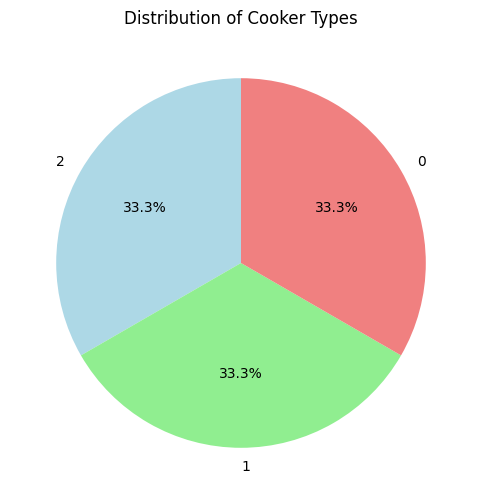

In [ ]:
# Plot a pie chart for Cooker Type distribution
cooker_type_counts = data['Cooker Type'].value_counts()

plt.figure(figsize=(8, 6))
cooker_type_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Cooker Types')
plt.ylabel('')  # Remove ylabel for aesthetics
plt.show()

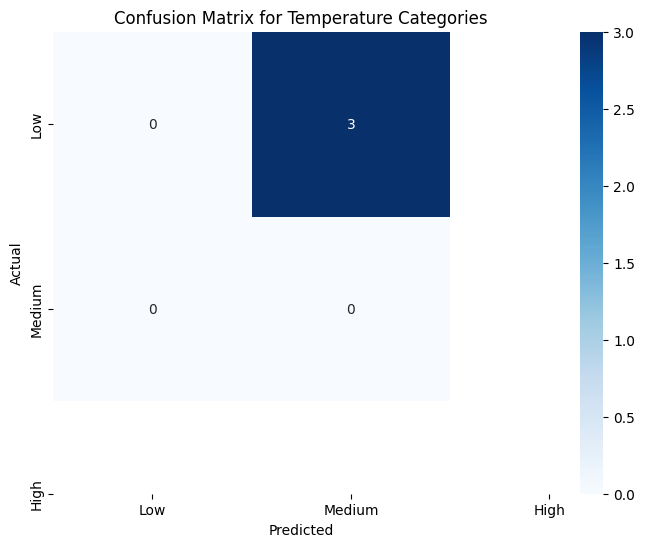

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert temperature values into categories (example: low, medium, high temperature)
bins = [0, 100, 150, 200]  # Example bins
labels = ['Low', 'Medium', 'High']
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
y_pred_binned = pd.cut(y_pred_rf, bins=bins, labels=labels)

# Create confusion matrix
cm = confusion_matrix(y_test_binned, y_pred_binned)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Temperature Categories')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Create a comparison table for actual vs predicted temperatures
comparison_predictions = pd.DataFrame({
    "Actual Temperature": y_test,
    "RF Predicted Temperature": y_pred_rf,
    "LR Predicted Temperature": y_pred_lr,
    "SVR Predicted Temperature": y_pred_svr
                })

print(comparison_predictions)

    Actual Temperature  RF Predicted Temperature  LR Predicted Temperature  \
10                 168                148.004762                     157.5   
9                  155                141.590667                     164.0   
0                  152                132.661333                     142.0   

    SVR Predicted Temperature  
10                 132.100001  
9                  132.100002  
0                  132.100001  
